# Importing and analyzing data 

Import important libraries.

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

We will take data from our github repositories, which were downloaded from kaggle.

In [ ]:
url = 'https://raw.githubusercontent.com/maihadat/Disease-Prediction/topic/change_data_and-add_test_decision_tree/Data_sets/dataset.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,Severity,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,...,receiving_unsterile_injections,coma,sinus_pressure,palpitations,stomach_bleeding,runny_nose,congestion,blood_in_sputum,loss_of_smell,Disease
0,0,13,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,1,11,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,2,10,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,3,8,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,4,13,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,5404,29,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,Dimorphic hemmorhoids(piles)
5405,5405,31,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,Cervical spondylosis
5406,5406,43,1,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,AIDS
5407,5407,16,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chicken pox


Drop redundant column.


In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)

The number of diseases.

**Check if there is null or nan value**

In [ ]:
sum(df.isna().sum())

0

In [ ]:
sum(df.isnull().sum())

0

Encode the label.

In [ ]:
encoder = LabelEncoder()
df["Disease"] = encoder.fit_transform(df["Disease"])

We can see that the data is quite clear and since it is a small dataset, it can lead to high accuracy.

**Train and test set split**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:-1]
Y = df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
print("The number of datapoints in training set, test set:\n" + str(len(X_train)) + ", " + str(len(X_test)))

The number of datapoints in training set, test set:
4327, 1082


# DecisionTree

Firsly, we import DecisionTreeClassifier from sklearn and fit it to the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

print(tree.score(X_test, Y_test)*100)

96.21072088724584


It have quite good accuracy

Drop columns(attributes) having no importance.

In [ ]:
fi = pd.DataFrame(tree.feature_importances_*100, X_train.columns, columns=['Importance'])
fi.sort_values(by='Importance',ascending=False, inplace=True)
fi[fi["Importance"] == 0]

,Importance
congestion,0.0
runny_nose,0.0
palpitations,0.0
coma,0.0
anxiety,0.0
redness_of_eyes,0.0
receiving_blood_transfusion,0.0
Fever,0.0
Sore-Throat,0.0
throat_irritation,0.0


In [ ]:
zeros = np.array(fi[fi['Importance'] == 0].index)
zeros

array([' congestion', ' runny_nose', ' palpitations', ' coma', ' anxiety',
       ' redness_of_eyes', ' receiving_blood_transfusion', 'Fever',
       'Sore-Throat', ' throat_irritation', 'Tiredness', 'None_Sympton',
       ' brittle_nails', ' enlarged_thyroid', ' loss_of_smell'],
      dtype=object)

In [ ]:
training_new = df.drop(columns=zeros, axis=1)
training_new.shape[1]
training_new.columns

Index(['Severity', 'itching', ' skin_rash', ' continuous_sneezing',
       ' shivering', ' stomach_pain', ' acidity', ' vomiting', ' indigestion',
       ' muscle_wasting',
       ...
       ' red_spots_over_body', ' belly_pain', ' acute_liver_failure',
       ' rusty_sputum', ' abnormal_menstruation',
       ' receiving_unsterile_injections', ' sinus_pressure',
       ' stomach_bleeding', ' blood_in_sputum', 'Disease'],
      dtype='object', length=128)

Fitting new data to the DecisionTree model and then ploting out the confusion matrix for better understanding at the result.

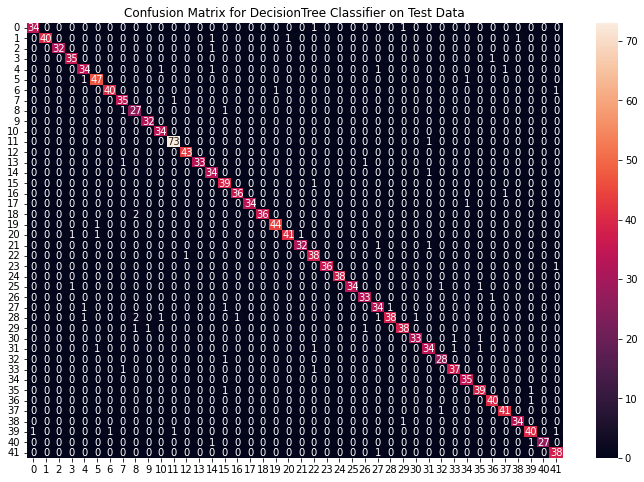

Acurray on test set: 95.50%


In [ ]:
import seaborn as sns
x_new = df.drop('Disease', axis = 1)
y_new = df.Disease
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.3, random_state=42) 
tree.fit(x_train_new, y_train_new)
    
pred_new = tree.predict(x_test_new)
    
acc_new = tree.score(x_test_new, y_test_new)

cf_matrix = confusion_matrix(y_test_new, pred_new)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for DecisionTree Classifier on Test Data")
plt.show()

print("Acurray on test set: {:.2f}%".format(acc_new*100))

We could see an increasement in accuracy in the test set. 